MRI and Alzheimers
Magnetic Resonance Imaging Comparisons of Demented and Nondemented Adults DataSet

The dataset used for this study project was obtained by CC:00 Creative Commons Public Domain license at kaggle.com https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv

'This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.
Acknowledgements:

When publishing findings that benefit from OASIS data, please include the following grant numbers in the acknowledgements section and in the associated Pubmed Central submission: P50 AG05681, P01 AG03991, R01 AG021910, P20 MH071616, U24 RR0213'

In [89]:
import pandas as pd
import numpy as np


link2 = 'https://storage.googleapis.com/kagglesdsdata/datasets%2F1980%2F3398%2Foasis_longitudinal.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592166023&Signature=BrQ74M0vz5ds8klKjwaszBc2Oimog2aoKrotiYTYijh85pVi7bSSEKPra7eIrdgZ24VXWQ3%2BVwOOtp8tufqDF1%2F7U%2F5LKXg8%2BflFTSy5gabwE0hyNfRQAcXyOext5JjGfjBDiqlA%2FyNZ9QMrT8Q7oCXSjm7Uyw%2BmCsutp3ngQ%2F8xYuYRoEV4ZZ8Sow7WEEW1h9bOqfD7i%2Fw0QwI1Os3P6fCedih6i3ZUezXMWCjXsEfq3Paxr4i8e1RiVb7pF%2F2ucT%2FTb59BcfP8AVKP1VeJv%2BzLm0aISUDvmK4qRdvFTHuBqW0G4Y5yzSjKn42F2FdrUIzpLONiVNaOMkvESZA6gw%3D%3D'

df = pd.read_csv(link2)

df['M/F'] = df['M/F'].map({'M': 1, 'F': 0})
df['Hand'] = df['Hand'].map({'R': 1, 'L': 0})
df['Group'] = df['Group'].map({'Demented': 2, 'Nondemented': 4})

In [90]:
df.dropna()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,4.0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,4.0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,4.0,1,0,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,4.0,2,538,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,4.0,1,0,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2.0,2,842,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,2.0,3,2297,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,4.0,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,4.0,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [91]:
df = df[pd.to_numeric(df['Group'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['M/F'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Hand'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['SES'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['MMSE'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['CDR'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['nWBV'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['ASF'], errors='coerce').notnull()]

In [92]:
feature_df = df[['Age', 'M/F', 'Hand', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X = np.asarray(feature_df)
X[0:5]


array([[8.70e+01, 1.00e+00, 1.00e+00, 1.40e+01, 2.70e+01, 0.00e+00,
        1.99e+03, 6.96e-01, 8.83e-01],
       [8.80e+01, 1.00e+00, 1.00e+00, 1.40e+01, 3.00e+01, 0.00e+00,
        2.00e+03, 6.81e-01, 8.76e-01],
       [8.80e+01, 0.00e+00, 1.00e+00, 1.80e+01, 2.80e+01, 0.00e+00,
        1.22e+03, 7.10e-01, 1.44e+00],
       [9.00e+01, 0.00e+00, 1.00e+00, 1.80e+01, 2.70e+01, 0.00e+00,
        1.20e+03, 7.18e-01, 1.46e+00],
       [8.00e+01, 1.00e+00, 1.00e+00, 1.20e+01, 2.80e+01, 0.00e+00,
        1.69e+03, 7.12e-01, 1.04e+00]])

In [93]:
df['Group'] = df['Group'].astype('int')
y = np.asarray(df['Group'])
y [0:5]

array([4, 4, 4, 4, 4])

In [94]:
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (253, 9) (253,)
Test set: (64, 9) (64,)


In [96]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
yhat = clf.predict(X_test)
yhat [0:5]

array([4, 4, 4, 4, 4])

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        27
           4       0.58      1.00      0.73        37

    accuracy                           0.58        64
   macro avg       0.29      0.50      0.37        64
weighted avg       0.33      0.58      0.42        64

Confusion matrix, without normalization
[[37  0]
 [27  0]]


/Users/cdm_oz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


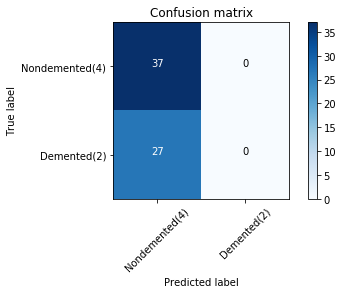

In [99]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[4,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Nondemented(4)','Demented(2)'],normalize= False,  title='Confusion matrix')

In [100]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.42357673267326734

In [101]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/cdm_oz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.578125

So, Support Vector Machine accuracy was quite low for the selected parameters. It easily detected the data points marked as "nondemented", while systematically made errors for the category 'demented'. We could suggest that such behavior of the model could also depend on dataset characteristics.

This time we will use logistic regression.

In [76]:
X = np.asarray(df[['Age', 'M/F', 'Hand', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']])
X[0:5]

array([[8.70e+01, 1.00e+00, 1.00e+00, 1.40e+01, 2.70e+01, 0.00e+00,
        1.99e+03, 6.96e-01, 8.83e-01],
       [8.80e+01, 1.00e+00, 1.00e+00, 1.40e+01, 3.00e+01, 0.00e+00,
        2.00e+03, 6.81e-01, 8.76e-01],
       [8.80e+01, 0.00e+00, 1.00e+00, 1.80e+01, 2.80e+01, 0.00e+00,
        1.22e+03, 7.10e-01, 1.44e+00],
       [9.00e+01, 0.00e+00, 1.00e+00, 1.80e+01, 2.70e+01, 0.00e+00,
        1.20e+03, 7.18e-01, 1.46e+00],
       [8.00e+01, 1.00e+00, 1.00e+00, 1.20e+01, 2.80e+01, 0.00e+00,
        1.69e+03, 7.12e-01, 1.04e+00]])

In [77]:
y = np.asarray(df['Group'])
y [0:5]

array([4, 4, 4, 4, 4])

In [78]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.32,  1.15,  0.  , -0.21, -0.07, -0.72,  2.75, -0.91, -2.21],
       [ 1.45,  1.15,  0.  , -0.21,  0.71, -0.72,  2.84, -1.3 , -2.26],
       [ 1.45, -0.87,  0.  ,  1.16,  0.19, -0.72, -1.55, -0.54,  1.81],
       [ 1.7 , -0.87,  0.  ,  1.16, -0.07, -0.72, -1.64, -0.33,  1.94],
       [ 0.42,  1.15,  0.  , -0.89,  0.19, -0.72,  1.09, -0.49, -1.09]])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (253, 9) (253,)
Test set: (64, 9) (64,)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
yhat = LR.predict(X_test)
yhat

array([4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4])

In [82]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.31, 0.69],
       [0.26, 0.74],
       [0.24, 0.76],
       [0.51, 0.49],
       [0.26, 0.74],
       [0.63, 0.37],
       [0.29, 0.71],
       [0.28, 0.72],
       [0.65, 0.35],
       [0.67, 0.33],
       [0.52, 0.48],
       [0.35, 0.65],
       [0.88, 0.12],
       [0.32, 0.68],
       [0.45, 0.55],
       [0.91, 0.09],
       [0.49, 0.51],
       [0.25, 0.75],
       [0.37, 0.63],
       [0.25, 0.75],
       [0.27, 0.73],
       [0.28, 0.72],
       [0.37, 0.63],
       [0.77, 0.23],
       [0.24, 0.76],
       [0.55, 0.45],
       [0.32, 0.68],
       [0.25, 0.75],
       [0.33, 0.67],
       [0.64, 0.36],
       [0.36, 0.64],
       [0.29, 0.71],
       [0.71, 0.29],
       [0.75, 0.25],
       [0.56, 0.44],
       [0.27, 0.73],
       [0.48, 0.52],
       [0.3 , 0.7 ],
       [0.36, 0.64],
       [0.45, 0.55],
       [0.26, 0.74],
       [0.2 , 0.8 ],
       [0.9 , 0.1 ],
       [0.22, 0.78],
       [0.52, 0.48],
       [0.26, 0.74],
       [0.57, 0.43],
       [0.34,

In [83]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/cdm_oz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.921875

Confusion matrix, without normalization
[[36  1]
 [ 4 23]]


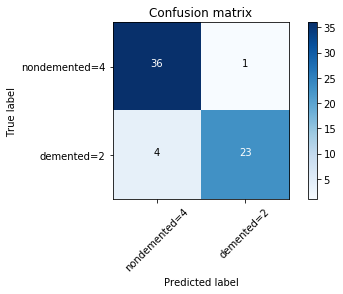

In [84]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[4,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nondemented=4','demented=2'],normalize= False,  title='Confusion matrix')

In [87]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       0.96      0.85      0.90        27
           4       0.90      0.97      0.94        37

    accuracy                           0.92        64
   macro avg       0.93      0.91      0.92        64
weighted avg       0.92      0.92      0.92        64



In [88]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.40527648352467643

Now the predictions look better. The model is still not perfect, but now it identifies non-demented and demented patients more correctly. 

To check our main hypothesis - if the brain data have an added value to put into diagnostics of neurodegenerative disorders, let's calculate the logistic regression on brain data only and then compare it to the results of the model on psychological and demographic characteristics only.

In [102]:
X = np.asarray(df[['eTIV', 'nWBV', 'ASF']])
X[0:5]


array([[1.99e+03, 6.96e-01, 8.83e-01],
       [2.00e+03, 6.81e-01, 8.76e-01],
       [1.22e+03, 7.10e-01, 1.44e+00],
       [1.20e+03, 7.18e-01, 1.46e+00],
       [1.69e+03, 7.12e-01, 1.04e+00]])

In [103]:
y = np.asarray(df['Group'])
y [0:5]

array([4, 4, 4, 4, 4])

In [104]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 2.75, -0.91, -2.21],
       [ 2.84, -1.3 , -2.26],
       [-1.55, -0.54,  1.81],
       [-1.64, -0.33,  1.94],
       [ 1.09, -0.49, -1.09]])

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (253, 3) (253,)
Test set: (64, 3) (64,)


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
yhat = LR.predict(X_test)
yhat

array([4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2])

In [108]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.43, 0.57],
       [0.38, 0.62],
       [0.54, 0.46],
       [0.44, 0.56],
       [0.4 , 0.6 ],
       [0.49, 0.51],
       [0.45, 0.55],
       [0.39, 0.61],
       [0.53, 0.47],
       [0.48, 0.52],
       [0.38, 0.62],
       [0.5 , 0.5 ],
       [0.55, 0.45],
       [0.51, 0.49],
       [0.59, 0.41],
       [0.53, 0.47],
       [0.42, 0.58],
       [0.38, 0.62],
       [0.55, 0.45],
       [0.38, 0.62],
       [0.42, 0.58],
       [0.43, 0.57],
       [0.5 , 0.5 ],
       [0.56, 0.44],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.52, 0.48],
       [0.43, 0.57],
       [0.41, 0.59],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.48, 0.52],
       [0.47, 0.53],
       [0.41, 0.59],
       [0.4 , 0.6 ],
       [0.41, 0.59],
       [0.4 , 0.6 ],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.39, 0.61],
       [0.39, 0.61],
       [0.3 , 0.7 ],
       [0.55, 0.45],
       [0.3 , 0.7 ],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.49, 0.51],
       [0.48,

In [109]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/cdm_oz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.53125

Confusion matrix, without normalization
[[23 14]
 [16 11]]


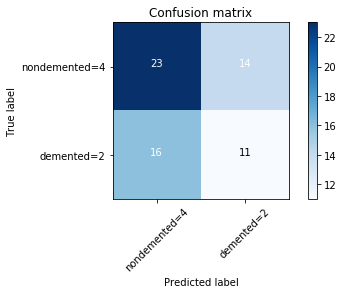

In [110]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[4,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nondemented=4','demented=2'],normalize= False,  title='Confusion matrix')

In [111]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6702827425765071

Now the quality of model prediction worsened. Confusion matrix show higher number of false positives and false negatives. Our last step, before we draw a conclusion - to check the model with psychological data.


In [112]:
X = np.asarray(df[['Age', 'M/F', 'Hand', 'EDUC', 'MMSE', 'CDR']])
X[0:5]

array([[87.,  1.,  1., 14., 27.,  0.],
       [88.,  1.,  1., 14., 30.,  0.],
       [88.,  0.,  1., 18., 28.,  0.],
       [90.,  0.,  1., 18., 27.,  0.],
       [80.,  1.,  1., 12., 28.,  0.]])

In [113]:
y = np.asarray(df['Group'])
y [0:5]

array([4, 4, 4, 4, 4])

In [114]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.32,  1.15,  0.  , -0.21, -0.07, -0.72],
       [ 1.45,  1.15,  0.  , -0.21,  0.71, -0.72],
       [ 1.45, -0.87,  0.  ,  1.16,  0.19, -0.72],
       [ 1.7 , -0.87,  0.  ,  1.16, -0.07, -0.72],
       [ 0.42,  1.15,  0.  , -0.89,  0.19, -0.72]])

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (253, 6) (253,)
Test set: (64, 6) (64,)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
yhat = LR.predict(X_test)
yhat

array([4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4])

In [118]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.32, 0.68],
       [0.3 , 0.7 ],
       [0.21, 0.79],
       [0.52, 0.48],
       [0.3 , 0.7 ],
       [0.62, 0.38],
       [0.28, 0.72],
       [0.31, 0.69],
       [0.62, 0.38],
       [0.67, 0.33],
       [0.58, 0.42],
       [0.31, 0.69],
       [0.86, 0.14],
       [0.28, 0.72],
       [0.37, 0.63],
       [0.9 , 0.1 ],
       [0.51, 0.49],
       [0.27, 0.73],
       [0.31, 0.69],
       [0.27, 0.73],
       [0.29, 0.71],
       [0.28, 0.72],
       [0.35, 0.65],
       [0.74, 0.26],
       [0.25, 0.75],
       [0.56, 0.44],
       [0.29, 0.71],
       [0.25, 0.75],
       [0.35, 0.65],
       [0.6 , 0.4 ],
       [0.34, 0.66],
       [0.27, 0.73],
       [0.71, 0.29],
       [0.79, 0.21],
       [0.62, 0.38],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.25, 0.75],
       [0.31, 0.69],
       [0.49, 0.51],
       [0.27, 0.73],
       [0.26, 0.74],
       [0.89, 0.11],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.27, 0.73],
       [0.56, 0.44],
       [0.33,

In [119]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/cdm_oz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9375

Confusion matrix, without normalization
[[36  1]
 [ 3 24]]


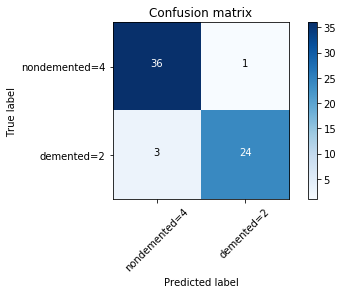

In [120]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[4,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nondemented=4','demented=2'],normalize= False,  title='Confusion matrix')

In [121]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.40276227888844357

So, if we compare confusion matrices for "brain&tests", "brain only" and "tests only" models, we will conclude that the "brain&tests" and "tests only" provides comparable results, while "brain only" model is not sufficient. Thus, based on this dataset we could assume that the brain data without the test data do not provide sufficient evidence to classify these two groups of observations.